# Automatic Ticket Classification Case Study
  ### ~Kiran Dalmiya & Arpita Datta

------------------------------------------------------------------------------------------------------------------------

## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [363]:
#!pip install wordcloud

In [364]:
import json 
import numpy as np
import pandas as pd
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px


import re, nltk, spacy, string
import en_core_web_sm
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import swifter
from sklearn.feature_extraction.text import TfidfTransformer



from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

In [365]:
#pip install swifter

## 1. Data Loading 

The data is in JSON format and we need to convert it to a dataframe.

In [366]:
# Opening JSON file 
f = open("C:/ML and AI/Course 5 NLP/Automatic Ticket Classification Case Study/complaints-2021-05-14_08_16.json")
 
data = json.load(f)
df=pd.json_normalize(data)

### Data preparation

In [367]:
# Inspect the dataframe to understand the given data.
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [368]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [369]:
df.shape

(78313, 22)

In [370]:
#Assign new column names
df.rename(columns={'_source.complaint_what_happened':'complaints', '_source.product':'tag'}, inplace=True)

In [371]:
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', 'tag',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely', 'complaints',
       '_source.sub_issue', '_source.consumer_consent_provided'],
      dtype='object')

In [372]:
df = df[['complaints', 'tag']]

In [373]:

df.head()

,complaints,tag
0,,Debt collection
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection
2,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card
3,,Mortgage
4,,Credit card or prepaid card


In [374]:
#Checking for blank values in complaints column
(df['complaints']=="").sum()

57241

In [375]:
#Assign nan in place of blanks in the complaints column
df['complaints'].replace('', np.nan, inplace=True)
(df['complaints'] == '').sum()

0

In [376]:
#Remove all rows where complaints column is nan
df.dropna(subset=['complaints'],inplace=True)


In [377]:
#Rechecking the presence of Null values in complaints column
df['complaints'].isna().sum()

0

In [378]:
df.shape

(21072, 2)

After removing null value rows for complaints field we are left with 21072 rows

In [379]:
#checking the tag column for null values
df['tag'].isna().sum()

0

In [380]:
df.head()

,complaints,tag
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection
2,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card
10,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.","Credit reporting, credit repair services, or other personal consumer reports"
11,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of their error.","Credit reporting, credit repair services, or other personal consumer reports"
14,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen XX/XX/2018 check number XXXX claim number is XXXX with chase,Checking or savings account


## 2. Text Processing :

## Prepare the text for topic modeling

After removing blank complaints:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


After all the cleaning operations, performed the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [381]:
# Function to clean the text and remove all the unnecessary elements.
def clean_data(text):
    text = text.lower() # text to lowercase
    text = re.sub(r'\s\{\$\S*', '',text) # Remove text within curly braces
    text = re.sub(r'\n', '', text) # Remove line breaks
    text = re.sub(r'\(\w*\)', '', text) #remove text within braces
    text = re.sub(r'(\W\s)|(\W$)|(\W\d*)', ' ',text) # Remove punctuation
    text = re.sub(r'x+((/xx)*/\d*\s*)|x*', '',text) #Remove date
    text = re.sub(r'\d+\s*', '', text) #Remove other numerical values
    text = re.sub(r' +', ' ',text) #Remove unnecessary white spaces
    return text


In [382]:
# Apply data cleaning to the complaints_what_happened column

df['complaints'] = df['complaints'].apply(clean_data)
df.head()

,complaints,tag
1,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account thanks in advance for your help,Debt collection
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,Credit card or prepaid card
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not etend credit without verifying the identity of the applicant,"Credit reporting, credit repair services, or other personal consumer reports"
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she eplained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then eplicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than mins after putting in the application on notwithstanding my eplicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,"Credit reporting, credit repair services, or other personal consumer reports"
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number claim number is with chase,Checking or savings account


In [383]:
# Function to Lemmatize the texts
def lemmatization(text):                   
    tokens = word_tokenize(text)                 ## Tokenize the input text into individual words
    wordnet_lemmetizer = WordNetLemmatizer()     ## Create an instance of the WordNetLemmatizer
    lemmatized = [wordnet_lemmetizer.lemmatize(token) for token in tokens] # Lemmatize each token and store the results in a list
    lemmatized_str = " ".join(lemmatized)             # Join the lemmatized tokens into a single string
    return lemmatized_str               # Return the lemmatized string

In [384]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = pd.DataFrame({'complaints':df['complaints'], 'lemmatized':df['complaints'].apply(lemmatization)})

In [385]:
df_clean.head()

,complaints,lemmatized
1,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account thanks in advance for your help,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember service in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information a a consumer chase account thanks in advance for your help
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,i upgraded my card in and wa told by the agent who did the upgrade my anniversary date would not change it turned the agent wa giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent ha the recording of the agent who wa misled me
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not etend credit without verifying the identity of the applicant,chase card wa reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain service do not etend credit without verifying the identity of the applicant
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she eplained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then eplicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than mins after putting in the application on notwithstanding my eplicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a reward card i put in my information for the offer and within le than a minute wa notified via the screen that a decision could not be made i immediately contacted and wa referred to chase bank i then immediately contacted chase bank within no more than minute of getting the notification on the screen and i wa told by the chase representative i spoke with that my application wa denied but she could not state why i asked for more information about the offer and she eplained that even if i had been approved the credit offer only get applied after the fi

In [386]:
## Loading the small English model from spaCy and disable the parser and named entity recognizer components for performance optimizaton
nlp = en_core_web_sm.load(disable=['parser','ner'])

In [387]:
#Write your function to extract the POS tags 

def get_pos_tags(text):
    nn_words = []                           # Initializing an empty list to store lemmatized nouns
    doc = nlp(text)                         # Processing the input text with the spaCy model
    for tok in doc:            # Iterating over each token in the processed text
        if(tok.tag_ == 'NN'):   # Checking if the token's POS tag is 'NN' (noun)
            nn_words.append(tok.lemma_)        # if word tag is noun Append the lemmatized form of the noun to the list nn_words
    nn_words_str = " ".join(nn_words)       # Joining the list of lemmatized nouns into a single string
    return nn_words_str          # Return the string of lemmatized nouns



#this creates a new column which contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].
df_clean["complaint_POS_removed"] =  df_clean.swifter.apply(lambda x: get_pos_tags(x['lemmatized']), axis=1)



Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [388]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaints,lemmatized,complaint_POS_removed
1,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account thanks in advance for your help,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember service in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information a a consumer chase account thanks in advance for your help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,i upgraded my card in and wa told by the agent who did the upgrade my anniversary date would not change it turned the agent wa giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent ha the recording of the agent who wa misled me,card agent anniversary date agent information order account anniversary date consent recording agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not etend credit without verifying the identity of the applicant,chase card wa reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain service do not etend credit without verifying the identity of the applicant,card application identity consent service credit identity applicant
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she eplained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then eplicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than mins after putting in the application on notwithstanding my eplicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a reward card i put in my information for the offer and within le than a minute wa notified via the screen that a decision could not be made i immediately contacted and wa referred to chase bank i then immediately contacted chas

## 3. Exploratory data analysis to get familiar with the data.

Data visulaisation:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




Text(0.5, 0, 'Length of Complaint')

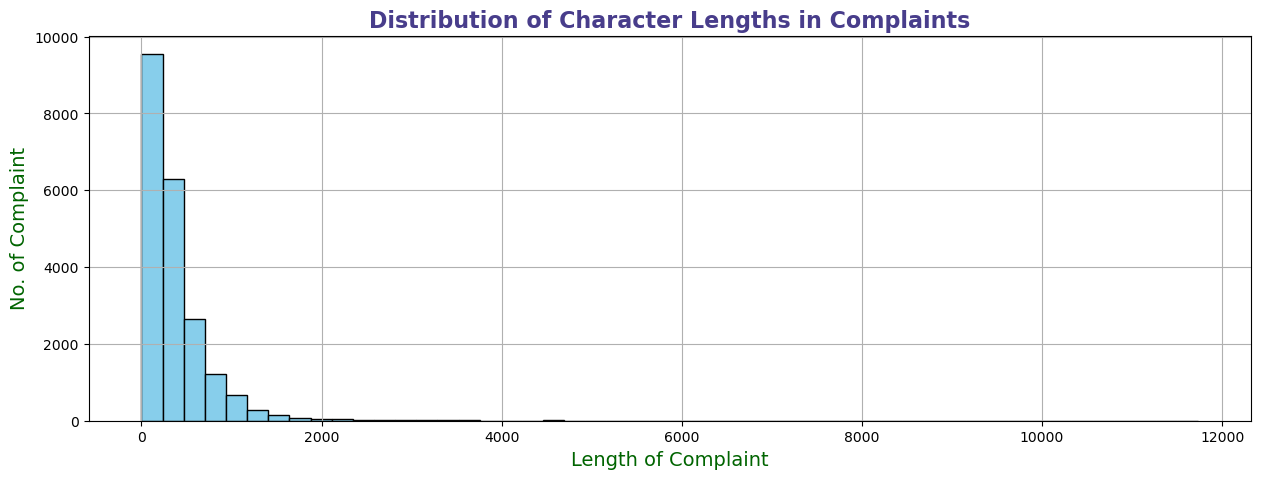

In [419]:
# Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=(15,5))
doc_comp = [len(x) for x in df_clean.complaint_POS_removed]
plt.hist(doc_comp, bins = 50,color='skyblue', edgecolor='black')
plt.title('Distribution of Character Lengths in Complaints',fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': 'DarkSlateBlue'})  
plt.grid(True)  
plt.ylabel('No. of Complaint',fontdict={'fontsize':14,'color':'DarkGreen'})
plt.xlabel('Length of Complaint',fontdict={'fontsize':14,'color':'DarkGreen'})



#### Find the top 40 words by frequency among all the articles after processing the text.

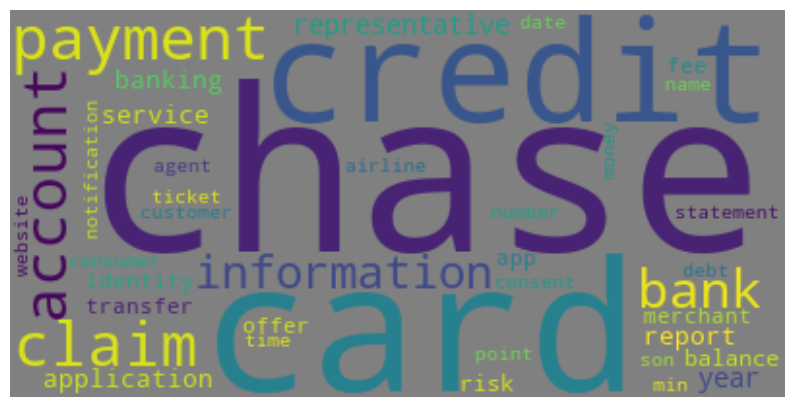

In [398]:
# Top 40 words frequency wise wordcloud


from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(max_words=40, random_state=1, stopwords=set(STOPWORDS),background_color='grey', colormap='viridis', 
                      contour_color='steelblue')            # Create a WordCloud object with specified parameters

# Generate the word cloud from the 'complaint_POS_removed' column of df_clean 
wordcloud.generate(str(df_clean['complaint_POS_removed']))


# Plot the word cloud

plt.figure(figsize=(10,6))

plt.imshow(wordcloud, interpolation="bilinear")  # Display the word cloud with bilinear interpolation
                                                #interpolation parameter determines how intermediate values are calculated when displaying the image. 
                                                #Bilinear interpolation ensures that the displayed image(word cloud or any image data) appears smooth and visually pleasing 
                                                #by calculating intermediate pixel values based on neighboring pixels.
                                                #It strikes a balance between computational efficiency and visual quality
plt.axis("off")  # Turns off the axis (both x and y axis).

plt.show()

In [399]:
df_clean.shape

(21072, 3)

In [488]:
#Removing -PRON- from the text corpus;  here in nlp -PRON- used to represent all pronouns after tokenization. 
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')
df_clean

,complaints,lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account thanks in advance for your help,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember service in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information a a consumer chase account thanks in advance for your help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,i upgraded my card in and wa told by the agent who did the upgrade my anniversary date would not change it turned the agent wa giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent ha the recording of the agent who wa misled me,card agent anniversary date agent information order account anniversary date consent recording agent,card agent anniversary date agent information order account anniversary date consent recording agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not etend credit without verifying the identity of the applicant,chase card wa reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain service do not etend credit without verifying the identity of the applicant,card application identity consent service credit identity applicant,card application identity consent service credit identity applicant
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she eplained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then eplicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than mins after putting in the application on notwithstanding my eplicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on while tryin

In [489]:
df_clean.shape

(21072, 4)

#### - Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [490]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean).

def get_top_n_bigram(text, ngram=1, top=None):
    
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)  # Initializing a CountVectorizer with specified ngram range and stop words removed
    bag_of_words = vec.transform(text)      # Transforming the text into a bag of words representation

    sum_words = bag_of_words.sum(axis=0)    # Sum the occurrences of each word in the bag of words 
    
    # Creating a list of tuples (word, frequency) sorted by frequency in descending order
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top]              # Return the top 'top' number of words and their frequencies

#### Unigram :

In [491]:
top_30_unigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=1, top=30)  # Gives the top 30 unigrams from the 'Complaint_clean' column
top_30_unigrams[:10]      # Display the first 10 elements of the top_30_unigrams list

[('chase', 54486),
 ('account', 47553),
 ('credit', 32787),
 ('card', 30434),
 ('bank', 21566),
 ('payment', 21367),
 ('time', 16311),
 ('day', 13324),
 ('charge', 12082),
 ('money', 12001)]

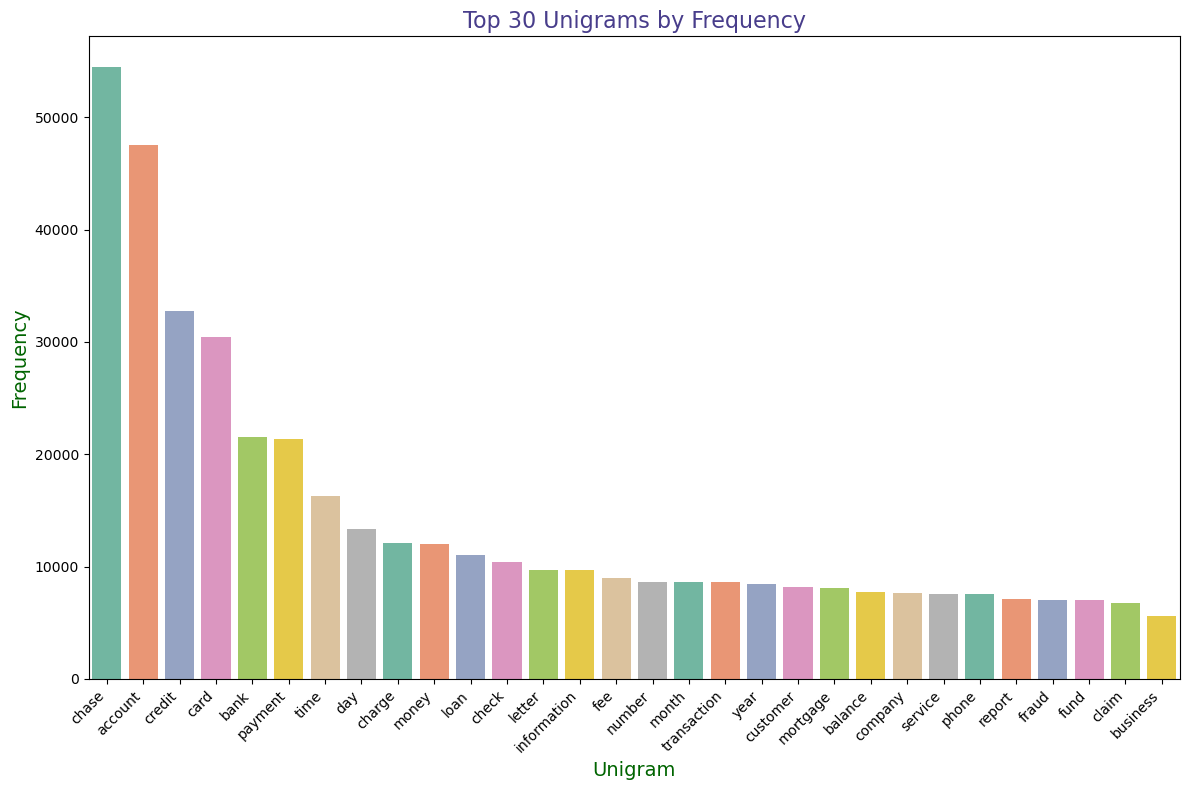

In [492]:
#Plot graph for the top 30 words in the unigram frequency

df1 = pd.DataFrame(top_30_unigrams, columns = ['unigram' , 'count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='unigram', y='count', data=df1, palette='Set2')  
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Unigram',fontdict={'fontsize':14,'color':'DarkGreen'})
plt.ylabel('Frequency',fontdict={'fontsize':14,'color':'DarkGreen'})
plt.title('Top 30 Unigrams by Frequency',fontdict={'fontsize':16,'color':'DarkSlateBlue'})
plt.tight_layout()  # Adjust layout for better fit
plt.show()

#### Bigram :

In [493]:
top_30_bigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=2, top=30) # Gives the top 30 bigrams from the 'Complaint_clean' column
top_30_bigrams # Display the first 10 elements of the top_30_bigrams list

[('credit card', 12930),
 ('credit report', 3892),
 ('account chase', 3452),
 ('chase account', 3148),
 ('chase credit', 3097),
 ('customer service', 3082),
 ('account account', 3041),
 ('bank account', 2639),
 ('chase bank', 2244),
 ('debit card', 2067),
 ('checking account', 2043),
 ('card chase', 1943),
 ('chase card', 1942),
 ('card account', 1857),
 ('payment payment', 1746),
 ('credit score', 1718),
 ('account credit', 1682),
 ('money account', 1539),
 ('account bank', 1439),
 ('chase chase', 1296),
 ('card card', 1287),
 ('business day', 1271),
 ('phone number', 1271),
 ('letter chase', 1266),
 ('account number', 1252),
 ('payment chase', 1237),
 ('credit bureau', 1213),
 ('card credit', 1201),
 ('card company', 1161),
 ('charge account', 1137)]

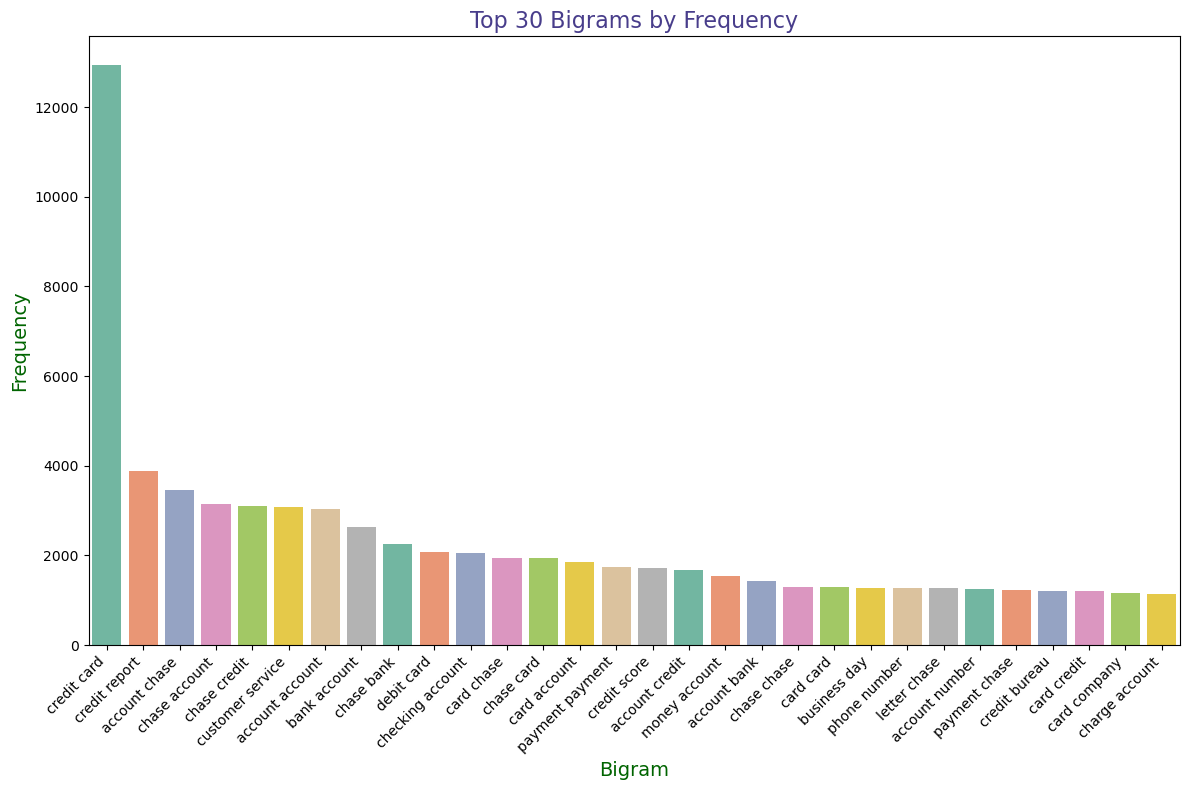

In [494]:

#Plot graph for the top 30 words in the bigram frequency
df2 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='bigram', y='count', data=df2, palette='Set2')  # Use viridis colormap
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Bigram',fontdict={'fontsize':14,'color':'DarkGreen'})
plt.ylabel('Frequency',fontdict={'fontsize':14,'color':'DarkGreen'})
plt.title('Top 30 Bigrams by Frequency',fontdict={'fontsize':16,'color':'DarkSlateBlue'})
plt.tight_layout()  # Adjust layout for better fit
plt.show()

#### Trigram :

In [495]:
top_30_trigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=3, top=30)  # Gives the top 30 trigrams from the 'Complaint_clean' column
top_30_trigrams # Display the first 10 elements of the top_30_trigrams list

[('chase credit card', 2027),
 ('credit card account', 1156),
 ('credit card company', 1005),
 ('credit card chase', 846),
 ('credit card credit', 589),
 ('inquiry credit report', 560),
 ('account credit card', 488),
 ('card credit card', 483),
 ('chase checking account', 394),
 ('credit report credit', 389),
 ('credit reporting agency', 388),
 ('charge credit card', 383),
 ('account chase account', 382),
 ('account credit report', 359),
 ('customer service representative', 350),
 ('credit card payment', 349),
 ('chase bank account', 340),
 ('credit card card', 295),
 ('bank credit card', 292),
 ('credit card balance', 291),
 ('credit card charge', 274),
 ('chase card service', 271),
 ('payment credit card', 265),
 ('chase auto finance', 262),
 ('credit reporting act', 260),
 ('chase account chase', 256),
 ('payment payment payment', 253),
 ('victim identity theft', 253),
 ('credit report chase', 246),
 ('account account account', 245)]

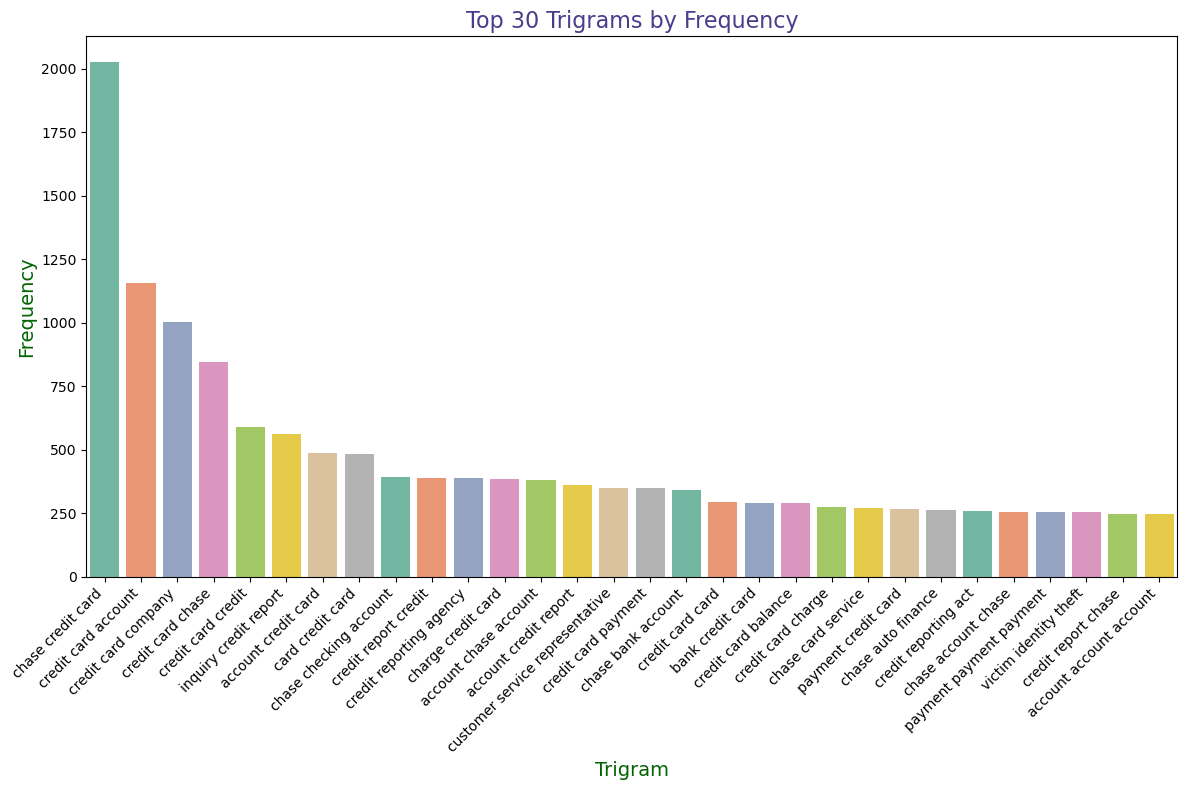

In [496]:

#Plot graph for the top 30 words in the trigram frequency
df3 = pd.DataFrame(top_30_trigrams, columns = ['trigram' , 'count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='trigram', y='count', data=df3, palette='Set2')  # Use viridis colormap
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Trigram',fontdict={'fontsize':14,'color':'DarkGreen'})
plt.ylabel('Frequency',fontdict={'fontsize':14,'color':'DarkGreen'})
plt.title('Top 30 Trigrams by Frequency',fontdict={'fontsize':16,'color':'DarkSlateBlue'})
plt.tight_layout()  # Adjust layout for better fit
plt.show()




In [497]:
df_clean

,complaints,lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account thanks in advance for your help,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember service in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information a a consumer chase account thanks in advance for your help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,i upgraded my card in and wa told by the agent who did the upgrade my anniversary date would not change it turned the agent wa giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent ha the recording of the agent who wa misled me,card agent anniversary date agent information order account anniversary date consent recording agent,card agent anniversary date agent information order account anniversary date consent recording agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not etend credit without verifying the identity of the applicant,chase card wa reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain service do not etend credit without verifying the identity of the applicant,card application identity consent service credit identity applicant,card application identity consent service credit identity applicant
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she eplained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then eplicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than mins after putting in the application on notwithstanding my eplicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on while tryin

#### The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [498]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [499]:
#All masked texts has been removed
df_clean

,complaints,lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account thanks in advance for your help,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember service in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information a a consumer chase account thanks in advance for your help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,i upgraded my card in and wa told by the agent who did the upgrade my anniversary date would not change it turned the agent wa giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent ha the recording of the agent who wa misled me,card agent anniversary date agent information order account anniversary date consent recording agent,card agent anniversary date agent information order account anniversary date consent recording agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not etend credit without verifying the identity of the applicant,chase card wa reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain service do not etend credit without verifying the identity of the applicant,card application identity consent service credit identity applicant,card application identity consent service credit identity applicant
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she eplained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then eplicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than mins after putting in the application on notwithstanding my eplicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on while tryin

## 4. Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [500]:
#Write your code here to initialise the TfidfVectorizer 

tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')


# max_df=0.95,  ==> Ignore terms that appear in more than 95% of the documents (highly frequent words)
# min_df=2,     ==> Ignore terms that appear in less than 2 documents (very rare words)
#stop_words='english'  ==> Remove common English stopwords like 'the', 'is', 'and', etc.

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [501]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])

#here
#fit_transform() method combines two steps:

#Fit: It first fits the TfidfVectorizer on the text data (df_clean['Complaint_clean']). 
     #This step learns the vocabulary of the corpus (all unique words in the 'Complaint_clean' column) and computes the IDF (Inverse Document Frequency) values.

#Transform: Then, it transforms the text data into a document-term matrix (dtm). 
            #Each row in the matrix corresponds to a document (complaint), and each column corresponds to a unique word in the vocabulary. The matrix entries are the TF-IDF values, which quantify the importance of each word in each document relative to the entire corpus.

In [502]:
# Retrieve the first 10 feature names (vocabulary) from the TfidfVectorizer
tfidf.get_feature_names_out()[:10]

array(['aa', 'aaa', 'aarp', 'abandonment', 'abatement', 'abbreviation',
       'abide', 'ability', 'absence', 'absent'], dtype=object)

In [503]:
# Get the number of feature names (vocabulary size) from the TfidfVectorizer
len(tfidf.get_feature_names_out())

5825

## 5.Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task we will perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [504]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
We need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good our final topics are.

In [505]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(random_state=40, n_components=num_topics)
W1 = nmf_model.fit_transform(dtm)   # Fit the NMF model on the document-term matrix (dtm)
H1 = nmf_model.components_ # Extract the components (topics) from the NMF model

In [506]:
len(tfidf.get_feature_names_out())

5825

In [507]:

print(W1)
len(W1)

[[0.02409732 0.00123097 0.01740801 0.0153795  0.01389835]
 [0.00795341 0.0146863  0.00221462 0.00085641 0.00693612]
 [0.         0.03779208 0.         0.0207704  0.        ]
 ...
 [0.01269493 0.         0.00481635 0.02767272 0.03530056]
 [0.         0.08071402 0.0684751  0.         0.        ]
 [0.02837728 0.01196165 0.06837049 0.02896603 0.00171458]]


21072

In [508]:
print(H1)
len(H1)

[[0.00000000e+00 5.45796158e-04 0.00000000e+00 ... 4.78985918e-05
  0.00000000e+00 1.00425961e-03]
 [0.00000000e+00 0.00000000e+00 7.94574551e-03 ... 0.00000000e+00
  2.32884603e-04 0.00000000e+00]
 [1.58024293e-04 3.89343386e-04 0.00000000e+00 ... 1.49029674e-04
  1.26477094e-03 4.96052536e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.19682229e-03 0.00000000e+00]
 [3.67034988e-04 1.08962779e-04 0.00000000e+00 ... 1.42739147e-04
  1.30892721e-04 2.85560904e-03]]


5

In [509]:
#Print the Top15 words for each of the topics
words = np.array(tfidf.get_feature_names_out())
topic_words_df = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)

for i in range(num_topics):
    ix = nmf_model.components_[i].argsort()[::-1][:15]
    topic_words_df.iloc[i] = words[ix]

topic_words_df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,check,bank,money,fund,chase,deposit,branch,day,fee,checking,business,number,transaction,customer
Topic 2,card,credit,chase,balance,account,fee,limit,score,year,month,purchase,point,offer,service,time
Topic 3,payment,loan,mortgage,chase,month,home,modification,time,year,rate,balance,property,fee,statement,day
Topic 4,inquiry,report,credit,company,bureau,information,reporting,debt,identity,score,theft,account,letter,application,creditor
Topic 5,charge,chase,transaction,dispute,claim,fraud,merchant,letter,email,service,information,phone,time,purchase,company


In [510]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_results = nmf_model.transform(dtm)
topic_results.argmax(axis=1)

array([0, 1, 1, ..., 4, 1, 2], dtype=int64)

In [511]:
df_clean.head(5)

,complaints,lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account thanks in advance for your help,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember service in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information a a consumer chase account thanks in advance for your help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,i upgraded my card in and wa told by the agent who did the upgrade my anniversary date would not change it turned the agent wa giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent ha the recording of the agent who wa misled me,card agent anniversary date agent information order account anniversary date consent recording agent,card agent anniversary date agent information order account anniversary date consent recording agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not etend credit without verifying the identity of the applicant,chase card wa reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain service do not etend credit without verifying the identity of the applicant,card application identity consent service credit identity applicant,card application identity consent service credit identity applicant
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she eplained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then eplicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than mins after putting in the application on notwithstanding my eplicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on while tryin

In [512]:
df_clean_topic=df_clean
df_clean_topic.head(5)

,complaints,lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account thanks in advance for your help,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember service in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information a a consumer chase account thanks in advance for your help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,i upgraded my card in and wa told by the agent who did the upgrade my anniversary date would not change it turned the agent wa giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent ha the recording of the agent who wa misled me,card agent anniversary date agent information order account anniversary date consent recording agent,card agent anniversary date agent information order account anniversary date consent recording agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not etend credit without verifying the identity of the applicant,chase card wa reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain service do not etend credit without verifying the identity of the applicant,card application identity consent service credit identity applicant,card application identity consent service credit identity applicant
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she eplained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then eplicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than mins after putting in the application on notwithstanding my eplicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on while tryin

In [513]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean_topic['Topic'] = topic_results.argmax(axis=1)

In [514]:
df_clean_topic.head()

,complaints,lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account thanks in advance for your help,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember service in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information a a consumer chase account thanks in advance for your help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help,0
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,i upgraded my card in and wa told by the agent who did the upgrade my anniversary date would not change it turned the agent wa giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent ha the recording of the agent who wa misled me,card agent anniversary date agent information order account anniversary date consent recording agent,card agent anniversary date agent information order account anniversary date consent recording agent,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not etend credit without verifying the identity of the applicant,chase card wa reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain service do not etend credit without verifying the identity of the applicant,card application identity consent service credit identity applicant,card application identity consent service credit identity applicant,1
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she eplained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then eplicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than mins after putting in the application on notwithstanding my eplicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on

In [515]:
# Print the first 5 Complaint for each of the Topics
First5_comp=df_clean_topic.groupby('Topic').head(5)
First5_comp.sort_values('Topic')

,complaints,lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account thanks in advance for your help,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember service in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information a a consumer chase account thanks in advance for your help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help,0
24,mishandling of this account by chase auto and,mishandling of this account by chase auto and,account chase auto,account chase auto,0
17,with out notice j p morgan chase restricted my account by my debit card tuesday on thursday i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement ive been called and i was told that it may take two business day stating tuesday would be the date that my funds would be available to withdraw from a bank teller only now chase is informing me that i will be mailed a check into the three business days to recover the funds that are owed to me and left in my account currently unfortunately this has put me in an additional financial bind do two fees from late rent late car payments etc i am not being a short or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document i am not being a shored or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document this situation is truly affecting my livelihood and they dont seem to want to deal with me professionally thank you,with out notice j p morgan chase restricted my account by my debit card tuesday on thursday i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the fund that are in there currently in a well a if my direct deposit from my place of employment would be returned the bank associate and the customer service rep

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Credit card or prepaid card to 3
* Bank Account services to 0
* Theft/Dispute Reporting to 4
* Mortgage/Loan to 2
* Others to 1



In [516]:
pd.set_option('display.max_colwidth', 1)

In [517]:
# Create the dictionary of Topic names and Topics
Topic_names = {0:'Account Services', 1:'Others', 2:'Mortgage/Loan', 3:'Credit card or prepaid card', 4:'Theft/Dispute Reporting'}

# Replace Topics with Topic Names
df_clean_topic['Topic'] = df_clean_topic['Topic'].map(Topic_names)

In [518]:
df_clean_topic.head(10)

,complaints,lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account thanks in advance for your help,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember service in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information a a consumer chase account thanks in advance for your help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help,Account Services
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,i upgraded my card in and wa told by the agent who did the upgrade my anniversary date would not change it turned the agent wa giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent ha the recording of the agent who wa misled me,card agent anniversary date agent information order account anniversary date consent recording agent,card agent anniversary date agent information order account anniversary date consent recording agent,Others
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not etend credit without verifying the identity of the applicant,chase card wa reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain service do not etend credit without verifying the identity of the applicant,card application identity consent service credit identity applicant,card application identity consent service credit identity applicant,Others
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she eplained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then eplicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than mins after putting in the application on notwithstanding my eplicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to 

## 6. Model building using supervised learning

#### Supervised model to predict any new complaints to the relevant Topics.

We have built a model to create the topics for each complaints.Now in the below section we will use them to classify any new complaints.

*Since we will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)*

In [519]:
# Create the dictionary again of Topic names and Topics

Topic_names = {'Account Services':0, 'Others':1, 'Mortgage/Loan':2, 'Credit card or prepaid card':3, 'Theft/Dispute Reporting':4}
# Replace Topics with Topic Names
df_clean_topic['Topic'] = df_clean_topic['Topic'].map(Topic_names)

In [520]:
df_clean_topic.head(20)

,complaints,lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account thanks in advance for your help,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember service in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information a a consumer chase account thanks in advance for your help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help,morning name stop bank service debt verification statement bank debt mail month debt right information consumer chase account advance help,0
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,i upgraded my card in and wa told by the agent who did the upgrade my anniversary date would not change it turned the agent wa giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent ha the recording of the agent who wa misled me,card agent anniversary date agent information order account anniversary date consent recording agent,card agent anniversary date agent information order account anniversary date consent recording agent,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not etend credit without verifying the identity of the applicant,chase card wa reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain service do not etend credit without verifying the identity of the applicant,card application identity consent service credit identity applicant,card application identity consent service credit identity applicant,1
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she eplained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then eplicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than mins after putting in the application on notwithstanding my eplicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on

In [521]:
# Keep the columns"complaints" & "Topic" only in the new dataframe --> training_data
training_data = df_clean_topic.drop(['lemmatized', 'complaint_POS_removed', 'Complaint_clean'], axis=1)

In [522]:
training_data

,complaints,Topic
1,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account thanks in advance for your help,0
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not etend credit without verifying the identity of the applicant,1
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she eplained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then eplicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than mins after putting in the application on notwithstanding my eplicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,3
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number claim number is with chase,0
...,...,...
78303,after being a chase card customer for well over a decade was offered multiple solicitations for acquiring new credit cards with chase all with bonus airline miles and hotel points was approved for all new cards with no annual fee for st year after less than months with payment always paid as agreed chase closed all my cards one of my approved new cards was never activated but was sent to me chase has done harm to my credit has charged me an annual fee even though they cancelled my account failed to credit my points for both airlines and hotel failed to credit up to for enrollment and failed to credit airline charge as agreed upon,1
78309,on wednesday i called chas my visa credit card provider and asked how to make a claim under their purchase protection benefit on i purchased three high school tetbooks for my year old daughter because she transferred to a new school all three books were damaged when a water bottle in her backpack broke the chase representative assured me the tetbooks would be covered and instructed me to file a claim at i immediately went to the website and filed the claim including uploading all of the

#### Applying the supervised models on the training data created. In this process, we are going to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [523]:
# Write your code to get the Vector count
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.complaints)

# Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [524]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report    #generates a detailed report that includes the precision, recall, F1-score, and support for each class.

In [525]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.Topic, test_size=0.2, random_state=42)

## 7. Model training and evaluation

**1. Logistic Regression**

In [526]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)

# Generate and print the classification report


print(classification_report(y_true=y_test, y_pred=predicted))   # This will display precision, recall, F1-score, and support for each class

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1038
           1       0.92      0.91      0.92       841
           2       0.93      0.95      0.94       999
           3       0.93      0.85      0.89       419
           4       0.88      0.90      0.89       918

    accuracy                           0.92      4215
   macro avg       0.92      0.91      0.91      4215
weighted avg       0.92      0.92      0.92      4215



**2. Decision Tree**

In [472]:
# Decision tree classifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
predicted = dt.predict(X_test)

print(classification_report(y_pred=predicted, y_true=y_test))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1038
           1       0.76      0.79      0.77       841
           2       0.83      0.81      0.82       999
           3       0.75      0.70      0.72       419
           4       0.67      0.67      0.67       918

    accuracy                           0.76      4215
   macro avg       0.76      0.75      0.75      4215
weighted avg       0.76      0.76      0.76      4215



**3. Random Forest Classifier**

In [473]:
rfc = RandomForestClassifier(max_depth=10)
rfc.fit(X_train, y_train)
predicted = rfc.predict(X_test)

print(classification_report(y_pred=predicted, y_true=y_test))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74      1038
           1       0.84      0.48      0.61       841
           2       0.71      0.94      0.81       999
           3       0.97      0.28      0.43       419
           4       0.76      0.62      0.68       918

    accuracy                           0.71      4215
   macro avg       0.78      0.65      0.66      4215
weighted avg       0.75      0.71      0.69      4215



**4. Gaussian Naive Bayes**

In [474]:
nb = GaussianNB().fit(X_train.toarray(), y_train)
predicted = nb.predict(X_test.toarray())

print(classification_report(y_pred=predicted, y_true=y_test))

              precision    recall  f1-score   support

           0       0.40      0.29      0.34      1038
           1       0.30      0.39      0.34       841
           2       0.52      0.41      0.46       999
           3       0.29      0.64      0.40       419
           4       0.39      0.28      0.32       918

    accuracy                           0.37      4215
   macro avg       0.38      0.40      0.37      4215
weighted avg       0.40      0.37      0.37      4215



### comparing model performances:

#### Logistic Regression:
- Precision: Overall high precision scores across all classes, indicating a low false positive rate.
- Recall: Balanced recall scores, suggesting the model effectively captures true positives.
- F1-Score: High F1-scores, reflecting good balance between precision and recall.
- Accuracy: ~0.9278 = 93%
#### Decision Tree Classifier:
- Precision: lower than Logistic Regression, especially for class 4.
- Recall: Moderate recall, with class 4 having the lowest.
- F1-Score: Moderate F1-scores across classes.
- Accuracy: 76%
#### Random Forest Classifier:
- Precision: Varied precision scores, with class 3 having exceptionally high precision.
- Recall: Varied recall scores, notably lower for classes 1 and 4.
- F1-Score: Mixed F1-scores, with some classes performing lower than others.
- Accuracy: 71%
#### Gaussian Naive Bayes:
- Precision: Lower precision scores across all classes.
- Recall: Varied recall scores, with class 3 having the highest recall.
- F1-Score: Generally lower F1-scores compared to other models.
- Accuracy: 37%

#### Insight:
Logistic Regression outperforms the other models across various metrics (precision, recall, F1-score, and accuracy).
Decision Tree and Random Forest Classifier show decent performance but generally lower than Logistic Regression, especially in precision and recall for certain classes.
Gaussian Naive Bayes performs the worst among the models, with significantly lower precision, recall, F1-score, and accuracy.



#### Logistic Regression emerges as the most suitable model for your dataset, offering the best balance between predictive accuracy and reliability across multiple evaluation metrics.

## 8. Model inference
### Infering the best model

In [475]:
# Some sample complaints to infer model

sample_complaints = pd.DataFrame({'complaints': ["I have been charged twice for the same transaction on my savings account, and despite contacting customer service multiple times, the issue remains unresolved. This has caused significant inconvenience as I'm unable to access my funds promptly", 
                                  "The bank has increased the interest rate on my mortgage unexpectedly, making it difficult for me to manage my monthly payments. I need to discuss options to revert to the previous rate or find a more suitable solution",
                                  "I was charged an annual fee for my credit card, which was not disclosed when I applied for the card. I need clarification on this fee and would like it to be refunded if it was charged in error.",
                                  "I noticed unauthorized withdrawals from my checking account and reported them to the bank immediately. Despite providing all necessary documentation, the funds have not been returned, and I need urgent assistance in recovering my money.",
                                  "I applied for a home loan with the bank, but the approval process has been delayed without explanation. I need clarity on the status of my application and a timeline for when I can expect a decision",
                                  "I need to know the number of bank branches and their locations in the city of Dubai",
                                                "Yesterday, I received a fraudulent email about renewing my services."]})
sample_complaints

,complaints
0,"I have been charged twice for the same transaction on my savings account, and despite contacting customer service multiple times, the issue remains unresolved. This has caused significant inconvenience as I'm unable to access my funds promptly"
1,"The bank has increased the interest rate on my mortgage unexpectedly, making it difficult for me to manage my monthly payments. I need to discuss options to revert to the previous rate or find a more suitable solution"
2,"I was charged an annual fee for my credit card, which was not disclosed when I applied for the card. I need clarification on this fee and would like it to be refunded if it was charged in error."
3,"I noticed unauthorized withdrawals from my checking account and reported them to the bank immediately. Despite providing all necessary documentation, the funds have not been returned, and I need urgent assistance in recovering my money."
4,"I applied for a home loan with the bank, but the approval process has been delayed without explanation. I need clarity on the status of my application and a timeline for when I can expect a decision"
5,I need to know the number of bank branches and their locations in the city of Dubai
6,"Yesterday, I received a fraudulent email about renewing my services."


In [476]:
def predict_lr(text):
    Topic_names = {0:'Account Services', 1:'Others', 2:'Mortgage/Loan', 3:'Credit card or prepaid card', 4:'Theft/Dispute Reporting'}
    X_new_counts = count_vect.transform(text)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)
    predicted = lr.predict(X_new_tfidf)
    return Topic_names[predicted[0]]

In [477]:
sample_complaints['tag'] = sample_complaints['complaints'].apply(lambda x: predict_lr([x]))
sample_complaints

,complaints,tag
0,"I have been charged twice for the same transaction on my savings account, and despite contacting customer service multiple times, the issue remains unresolved. This has caused significant inconvenience as I'm unable to access my funds promptly",Account Services
1,"The bank has increased the interest rate on my mortgage unexpectedly, making it difficult for me to manage my monthly payments. I need to discuss options to revert to the previous rate or find a more suitable solution",Mortgage/Loan
2,"I was charged an annual fee for my credit card, which was not disclosed when I applied for the card. I need clarification on this fee and would like it to be refunded if it was charged in error.",Others
3,"I noticed unauthorized withdrawals from my checking account and reported them to the bank immediately. Despite providing all necessary documentation, the funds have not been returned, and I need urgent assistance in recovering my money.",Account Services
4,"I applied for a home loan with the bank, but the approval process has been delayed without explanation. I need clarity on the status of my application and a timeline for when I can expect a decision",Mortgage/Loan
5,I need to know the number of bank branches and their locations in the city of Dubai,Account Services
6,"Yesterday, I received a fraudulent email about renewing my services.",Theft/Dispute Reporting


## Recommendation & Conclusion
    
* **Recommendations:**
    -  Use Logistic Regression for this classification task due to its superior performance metrics. It strikes a good balance between precision and recall across all classes, indicating robust performance in predicting class labels.
    - Consider tuning hyperparameters or exploring ensemble methods (like boosting or bagging) for Decision Trees and Random Forests to potentially improve their performance.
    - Gaussian Naive Bayes might not be suitable for this dataset due to its lower overall performance metrics.


<br />


* **Conclusion:**

  * **In conclusion, we identified five distinct topics:**
    1. Account Services,
    2. Others, 
    3. Mortgage/Loan, 
    4. Credit Card or Prepaid Card, 
    5. Theft/Dispute Reporting. 



  -  **Evaluating the dataset with four models yielded the following accuracies::**
    
    
    
    | Model              | Accuracy |
    |--------------------|----------|
    | <span style="color:green; font-weight:bold;">Logistic Regression</span> | <span style="color:green; font-weight:bold;">0.93</span> |
    | <span style="color:blue; font-weight:bold;">Decision Tree</span>       | <span style="color:blue; font-weight:bold;">0.76</span> |
    | <span style="color:purple; font-weight:bold;">Random Forest</span>      | <span style="color:purple; font-weight:bold;">0.71</span> |
    | <span style="color:red; font-weight:bold;">Naive Bayes</span>          | <span style="color:red; font-weight:bold;">0.37</span> |
    
 <br /> <br /> 


### With an accuracy of 0.93,<span style="color:green; font-weight:bold;"> Logistic Regression</span> demonstrates the highest performance among the models tested, making it well-suited for this particular case study.